# SPAM Dataset visualization

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from main import knn, nn, random_forest

Here we charge the dataframe from the spambase : 4600 emails with 58 features

In [3]:
data_spam = "../data/spambase/spambase.data"
df = pd.read_csv(data_spam)
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


We see that the columns are labeled as numbers like 0.1, 0.41... which does not help the understanding of the data. 

Thankfully, we have access to a .NAMES file with the name of the different columns. Using it we can create a list with the real names :

In [4]:
colonnes = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
    "char_freq_;",
    "char_freq_(",
    "char_freq_[",
    "char_freq_!",
    "char_freq_$",
    "char_freq_#",
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
    "is_spam",
]

We then change the name of the columns :

In [5]:
df.columns = colonnes

And verify with the .info() method.

We also check that there is no missing values in each of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

Using the .DOCUMENTATION file, we learn that each feature named "word_freq_*WORD*" represent the percentage of word in the email which **are** the word *WORD*. (48 features of this type)

For exemple :
- **word_freq_credit** gives the percentage of word in the email that match the word "*credit*"
- **word_freq_report** same with word "*report*"

6 features are named "char_freq_*CHAR*" which is the same as before but with a character *CHAR*.

Exemples :
- **char_freq_;**
- **char_freq_$**

The remaining columns are : 

**capital_run_length_average** = average length of uninterrupted sequences of capital letters

**capital_run_length_longest** = length of longest uninterrupted sequence of capital letters

**capital_run_length_total** = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

**is_spam** = denotes whether the e-mail was considered spam (1) or not (0),  i.e. unsolicited commercial e-mail

In [7]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


We check the number of spam in the dataset :

In [8]:
df["is_spam"].value_counts()

is_spam
0    2788
1    1812
Name: count, dtype: int64

We divide the names of the features in different lists :

In [9]:
# 6 lists of 8 words (for the 48 word_freq)
word_freq_1 = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
]

word_freq_2 = [
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
]

word_freq_3 = [
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
]

word_freq_4 = [
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
]

word_freq_5 = [
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
]

word_freq_6 = [
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
]

# 1 list with the characters
char_freq = ["char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#"]

# 1 list with the capital_run_lengths
capital_run = ["capital_run_length_average", "capital_run_length_longest", "capital_run_length_total"]

For each feature we can see the distribution on spam and no spam

In [ ]:
fig, axes = plt.subplots(10, 6, figsize=(15, 20))
axes = axes.flatten()
for idx, feature in enumerate(colonnes[:-1]):
    sns.kdeplot(
        data=df, x=feature, hue="is_spam", ax=axes[idx], fill=True, palette="Set2", alpha=0.3, common_norm=False
    )
    axes[idx].grid(True)
plt.tight_layout()
plt.show()

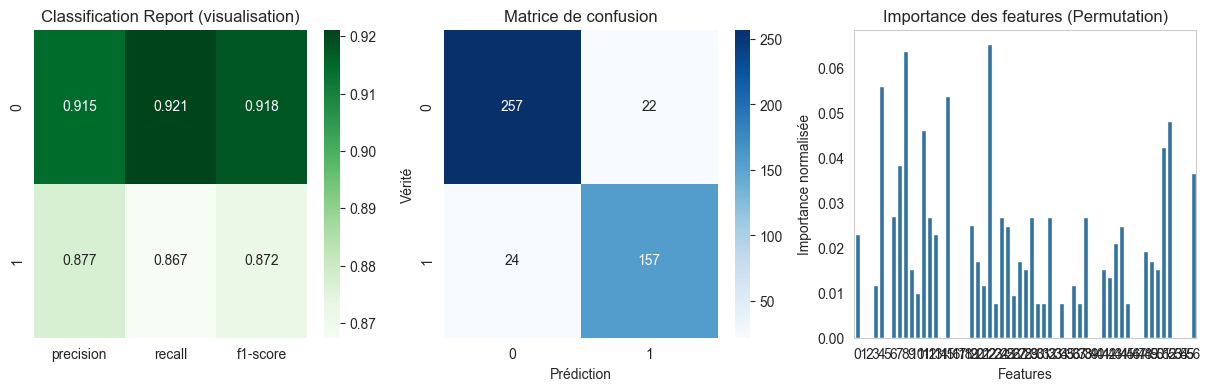

In [1]:
knn()

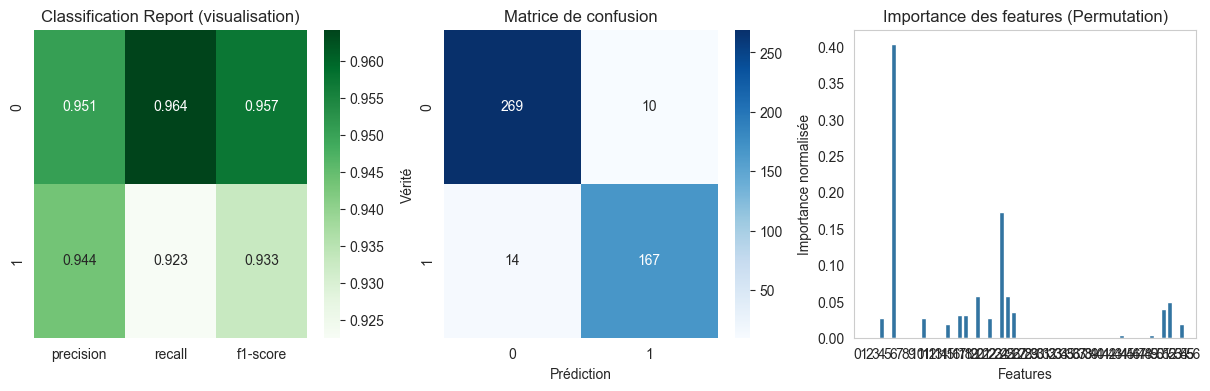

In [4]:
random_forest()

epoch: 1 	training Loss: 0.990568 
Validation loss improved → new best = 0.930603
epoch: 2 	training Loss: 0.957165 
No improvement in validation loss (current: 0.934289, best: 0.930603) → reverting weights
epoch: 3 	training Loss: 0.951628 
Validation loss improved → new best = 0.928248
epoch: 4 	training Loss: 0.947714 
No improvement in validation loss (current: 0.929651, best: 0.928248) → reverting weights
epoch: 5 	training Loss: 0.947994 
Validation loss improved → new best = 0.923891
epoch: 6 	training Loss: 0.943709 
No improvement in validation loss (current: 0.924370, best: 0.923891) → reverting weights
epoch: 7 	training Loss: 0.942679 
No improvement in validation loss (current: 0.927702, best: 0.923891) → reverting weights
epoch: 8 	training Loss: 0.942614 
No improvement in validation loss (current: 0.927642, best: 0.923891) → reverting weights
epoch: 9 	training Loss: 0.940037 
Validation loss improved → new best = 0.920858
epoch: 10 	training Loss: 0.939099 
No improvem

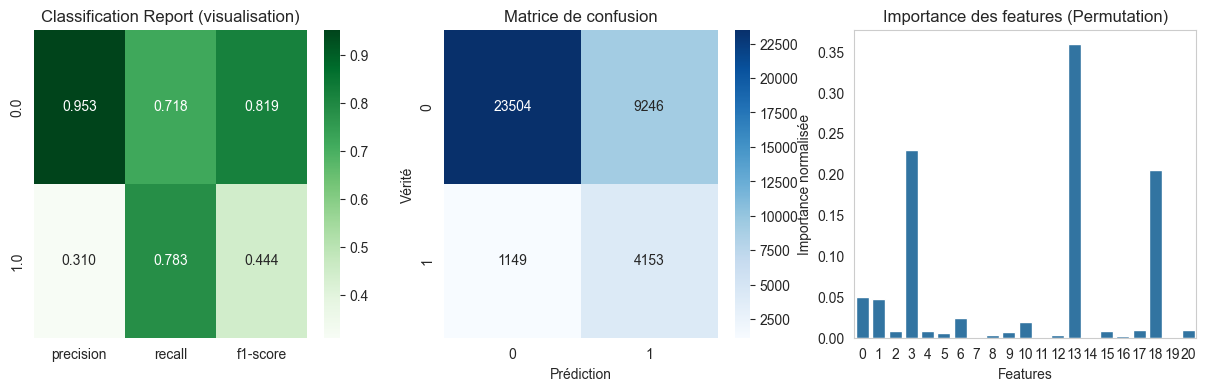

In [5]:
nn()